# Single Photon Counting Test

## Imports

In [1]:
import h5py
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
import pycentroids

In [3]:
pycentroids._pycentroids.omp_info()

{'dynamic': 0, 'num_procs': 64, 'threads_limit': 2147483647, 'threads_max': 64}

In [4]:
help(pycentroids.find_photons)

Help on function find_photons in module pycentroids.pycentroids:

find_photons(images, threshold=200, box=2, pixel_photon=10, overlap_max=0, sum_min=800, sum_max=1250, return_pixels='none', return_map=False)



## Load test data

In [5]:
!test -f images.h5 || curl -o images.h5 https://centroids-data.s3.amazonaws.com/images.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  406M  100  406M    0     0  56.2M      0  0:00:07  0:00:07 --:--:-- 59.4M


In [6]:
data = np.asarray(h5py.File('images.h5', 'r')['data'])

In [7]:
data.shape

(40, 1612, 3304)

In [8]:
#large_data = data.copy()
#for i in range(50):
#    large_data = np.concatenate((large_data, data))

In [9]:
#large_data.shape

## Call the fast code for single photon counting

In [10]:
#timeit.timeit("centroids.find_photons(large_data, 400, 2, store_pixels='none')", globals=globals(), number=1)
#pycentroids.find_photons(data, 400, 2, return_pixels='sorted')

In [11]:
df, out, pixels = pycentroids.find_photons(data, 400, 2, return_pixels='unsorted', return_map=True)

In [12]:
df.shape

(862, 22)

In [13]:
if out is not None:
    print(repr(out.shape))

(40, 1612, 3304)


In [14]:
if pixels is not None:
    print(pixels.shape)
    print()
    print(repr(pixels[0]))

(862, 25)

array([162, 152, 169, 163, 162, 156, 309, 326, 211, 197, 150, 384, 401,
       225, 172, 161, 166, 172, 153, 160, 159, 159, 168, 154, 187],
      dtype=uint16)


In [15]:
df = df[df['Fit Outcome'] < 4]
df.shape

(815, 22)

In [16]:
df

,Pixel X,Pixel Y,COM X,COM Y,COR COM X,COR COM Y,Int,Bgnd,Overlap,Fit X,...,Fit Amp,Fit Sigma,Fit Err X,Fit Err Y,Fit Err Bgnd,Fit Err Amp,Fit Err Sigma,Fit Fnorm,Fit Outcome,Fit StdErr
1,711.0,866.0,711.047912,865.976966,711.047667,865.976167,1085.333333,158.066667,0.0,711.122231,...,258.075871,-0.280219,0.092034,0.098230,8.036777,24.156876,0.057115,35.231658,2.0,7.046332
2,620.0,867.0,619.797391,866.930929,619.796500,866.930333,868.666667,157.533333,0.0,619.553465,...,185.356320,0.408186,0.134116,0.300406,22.941876,79.590954,0.270019,95.415329,1.0,19.083066
4,524.0,872.0,524.389522,872.021477,524.388667,872.020167,1024.333333,159.466667,0.0,524.297233,...,241.234386,0.404554,0.050242,0.075558,8.190839,27.697125,0.053442,34.442462,1.0,6.888492
5,557.0,872.0,557.337103,872.130244,557.335500,872.130167,913.666667,160.333333,0.0,557.238608,...,192.541946,0.355707,0.162948,0.192639,14.971987,49.475323,0.171453,63.540638,2.0,12.708128
6,604.0,872.0,604.424253,872.080264,604.423500,872.078833,959.333333,161.266667,0.0,604.305670,...,210.302586,0.430126,0.096965,0.141199,13.628327,47.200312,0.100758,56.722633,3.0,11.344527
7,633.0,872.0,633.059424,872.178273,633.058667,872.177833,1077.000000,159.400000,0.0,632.903958,...,233.081118,0.351922,0.138809,0.131519,14.736451,47.175279,0.086218,63.283096,1.0,12.656619
8,646.0,872.0,646.042636,872.189922,646.042167,872.188833,1032.000000,162.600000,0.0,645.905892,...,226.643236,0.434404,0.153191,0.127921,16.523328,57.358640,0.107689,68.701597,3.0,13.740319
9,700.0,872.0,700.123159,872.546224,700.122833,872.544500,1063.666667,159.533333,0.0,700.076813,...,242.749287,0.406673,0.120064,0.051355,12.369088,42.107187,0.090972,51.866657,3.0,10.373331
10,725.0,872.0,725.198714,871.809968,725.198000,871.809333,1036.666667,163.333333,0.0,725.078636,...,233.561778,0.469687,0.142682,0.108566,15.542932,56.080364,0.105887,63.457629,3.0,12.691526
11,739.0,872.0,739.121700,872.157544,739.121000,872.155833,1199.666667,157.133333,0.0,739.113727,...,271.812544,-0.267109,0.197411,0.141437,11.160530,33.263585,0.130759,49.048927,1.0,9.809785


## Plot the results 
### Whole image

<IPython.core.display.Javascript object>


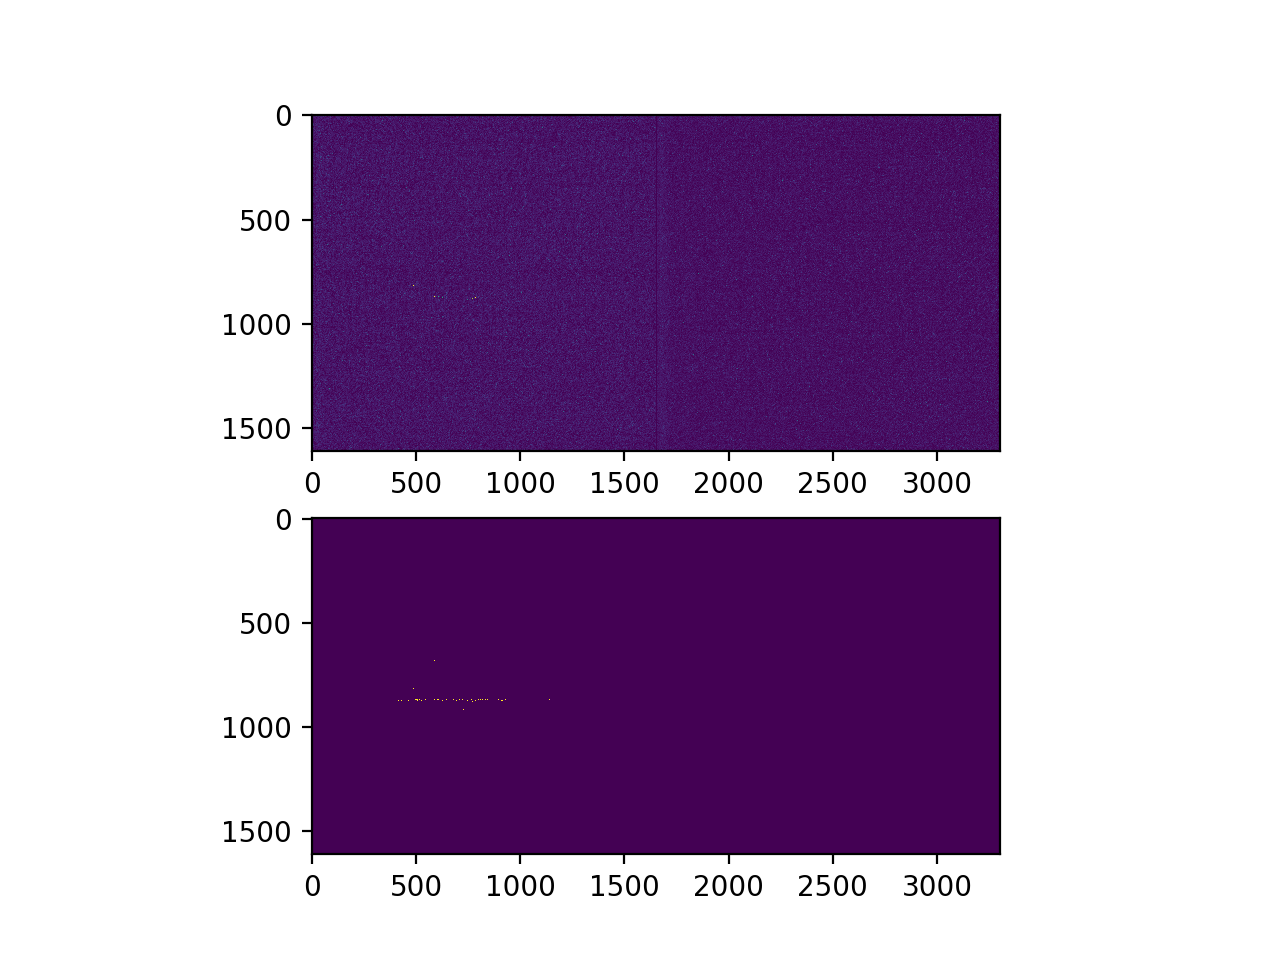

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1], vmin=150, vmax=300)
ax[1].imshow(out[-1]>0)

## Selected part of the image

<IPython.core.display.Javascript object>


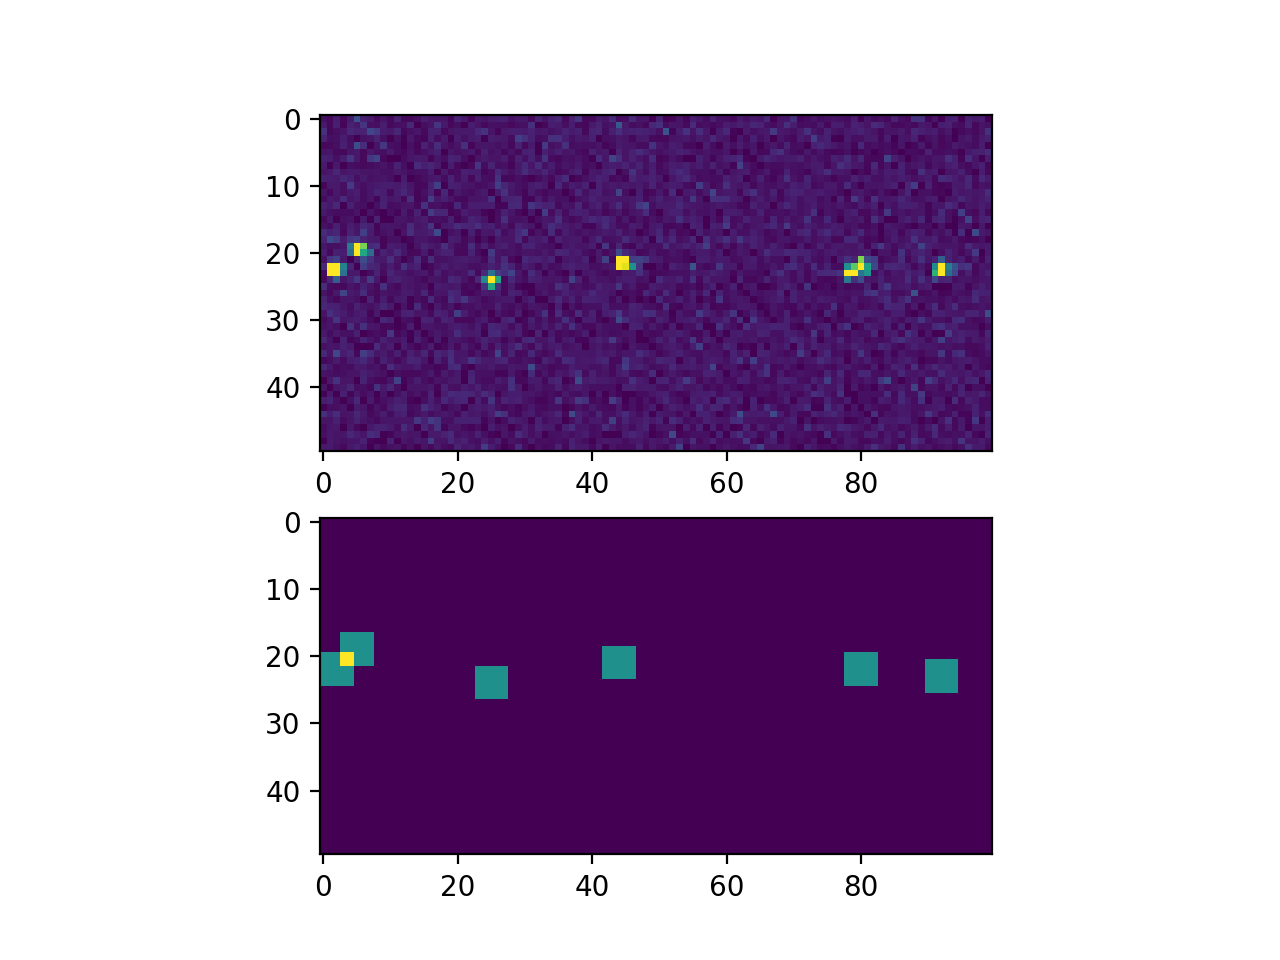

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1,850:900,600:700], vmin=150, vmax=300)
ax[1].imshow(out[-1,850:900,600:700] & 0xFF)

<IPython.core.display.Javascript object>


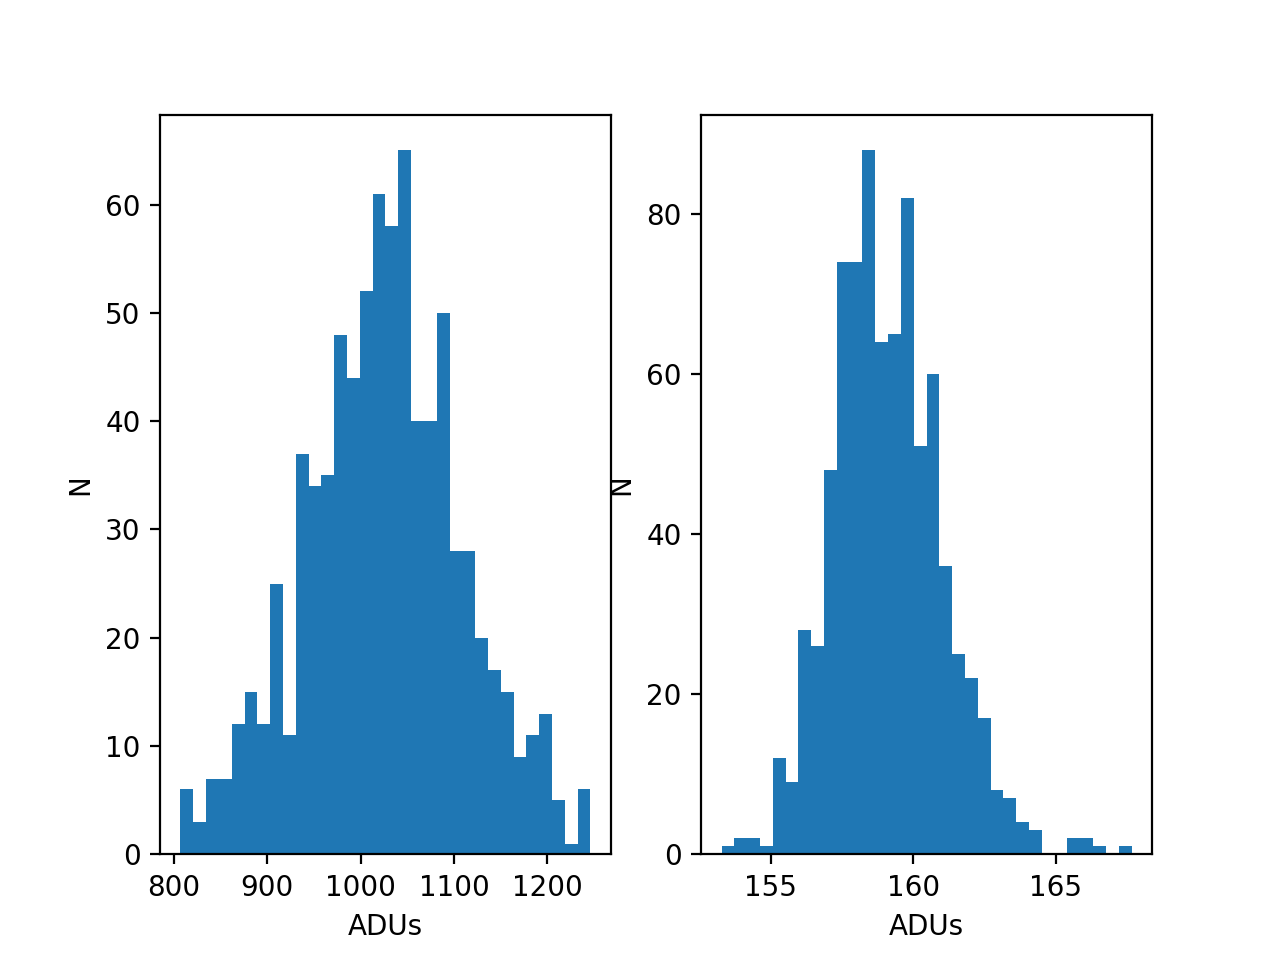

Text(0.5, 0, 'ADUs')

In [19]:
fig, ax = plt.subplots(1,2)
ax[0].hist(df['Int'], bins=32)
ax[0].set_ylabel('N')
ax[0].set_xlabel('ADUs')
ax[1].hist(df['Bgnd'], bins=32)
ax[1].set_ylabel('N')
ax[1].set_xlabel('ADUs')

In [20]:
xfrac = df['COM X'] - np.asarray(df['COM X'], dtype=int)
yfrac = df['COM Y'] - np.asarray(df['COM Y'], dtype=int)
xfrac_fit = df['Fit X'] - np.asarray(df['Fit X'], dtype=int)
yfrac_fit = df['Fit Y'] - np.asarray(df['Fit Y'], dtype=int)

<IPython.core.display.Javascript object>


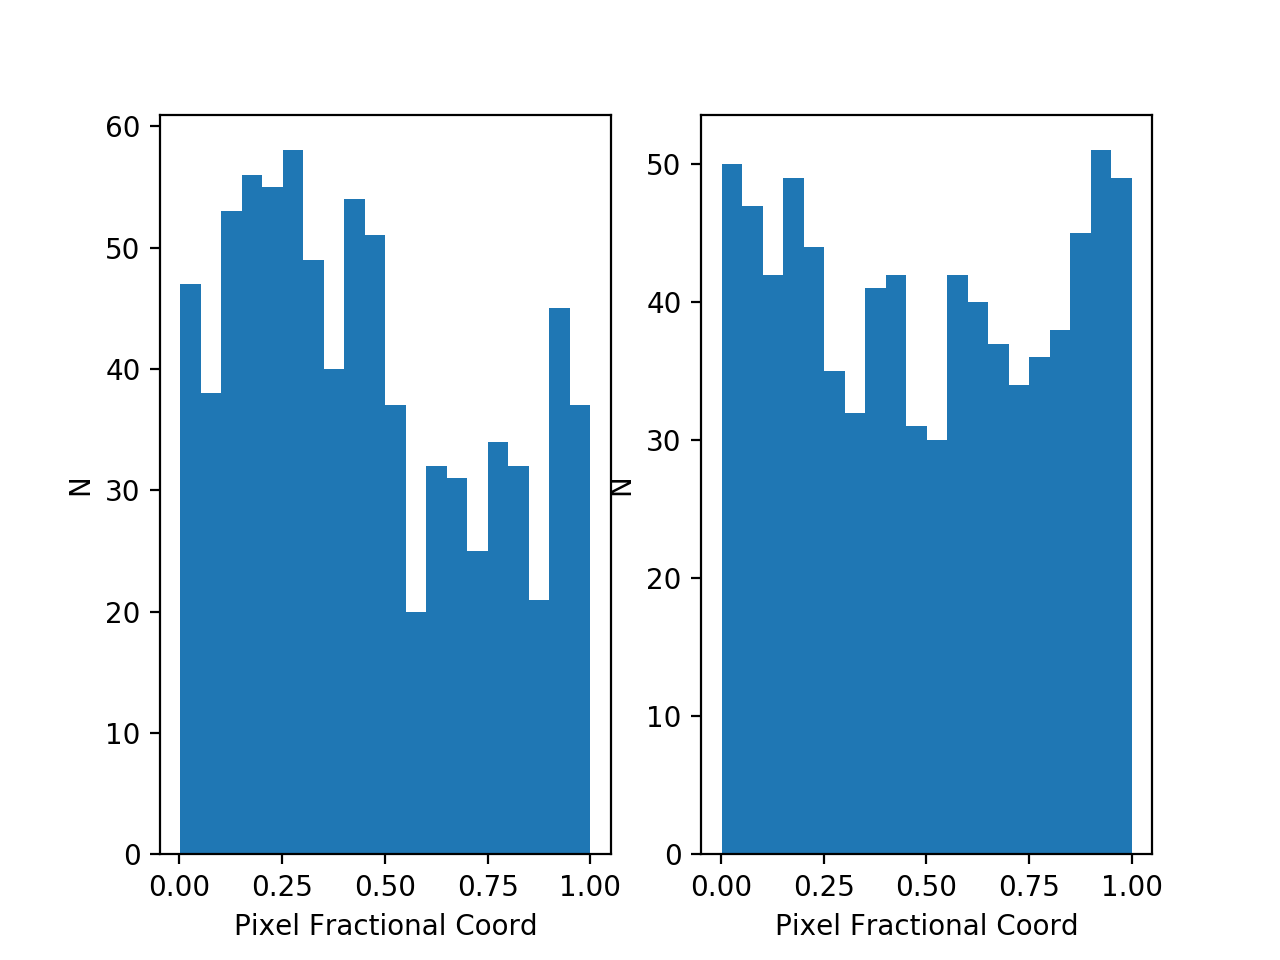

Text(0.5, 0, 'Pixel Fractional Coord')

In [21]:
fig, ax = plt.subplots(1,2)
ax[0].hist(xfrac_fit, bins=20)
ax[1].hist(yfrac_fit, bins=20)
ax[0].set_ylabel('N')
ax[0].set_xlabel('Pixel Fractional Coord')
ax[1].set_ylabel('N')
ax[1].set_xlabel('Pixel Fractional Coord')

<IPython.core.display.Javascript object>


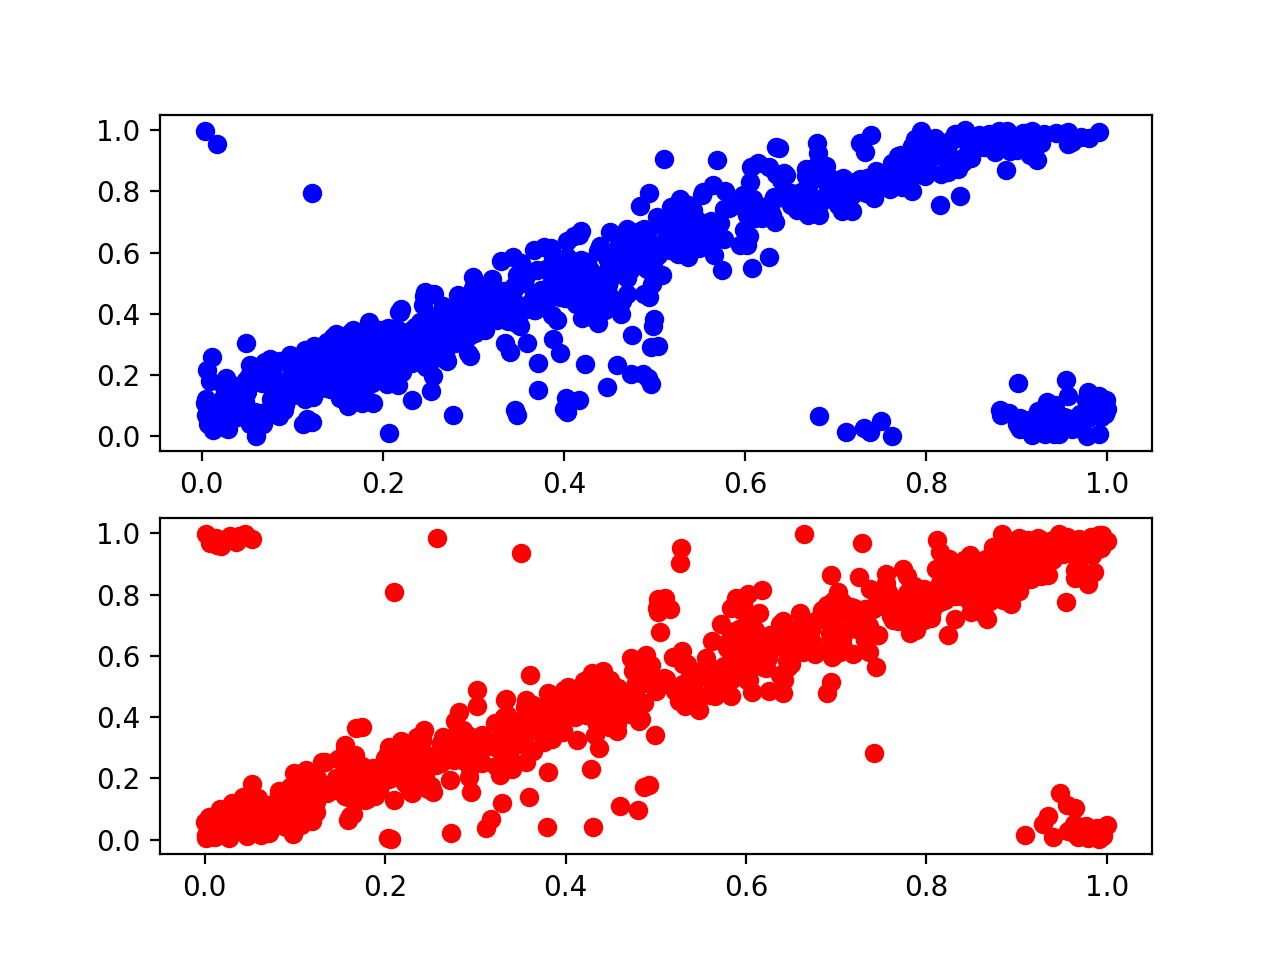

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(xfrac_fit, xfrac, 'bo')
ax[1].plot(yfrac_fit, yfrac, 'ro')

<IPython.core.display.Javascript object>


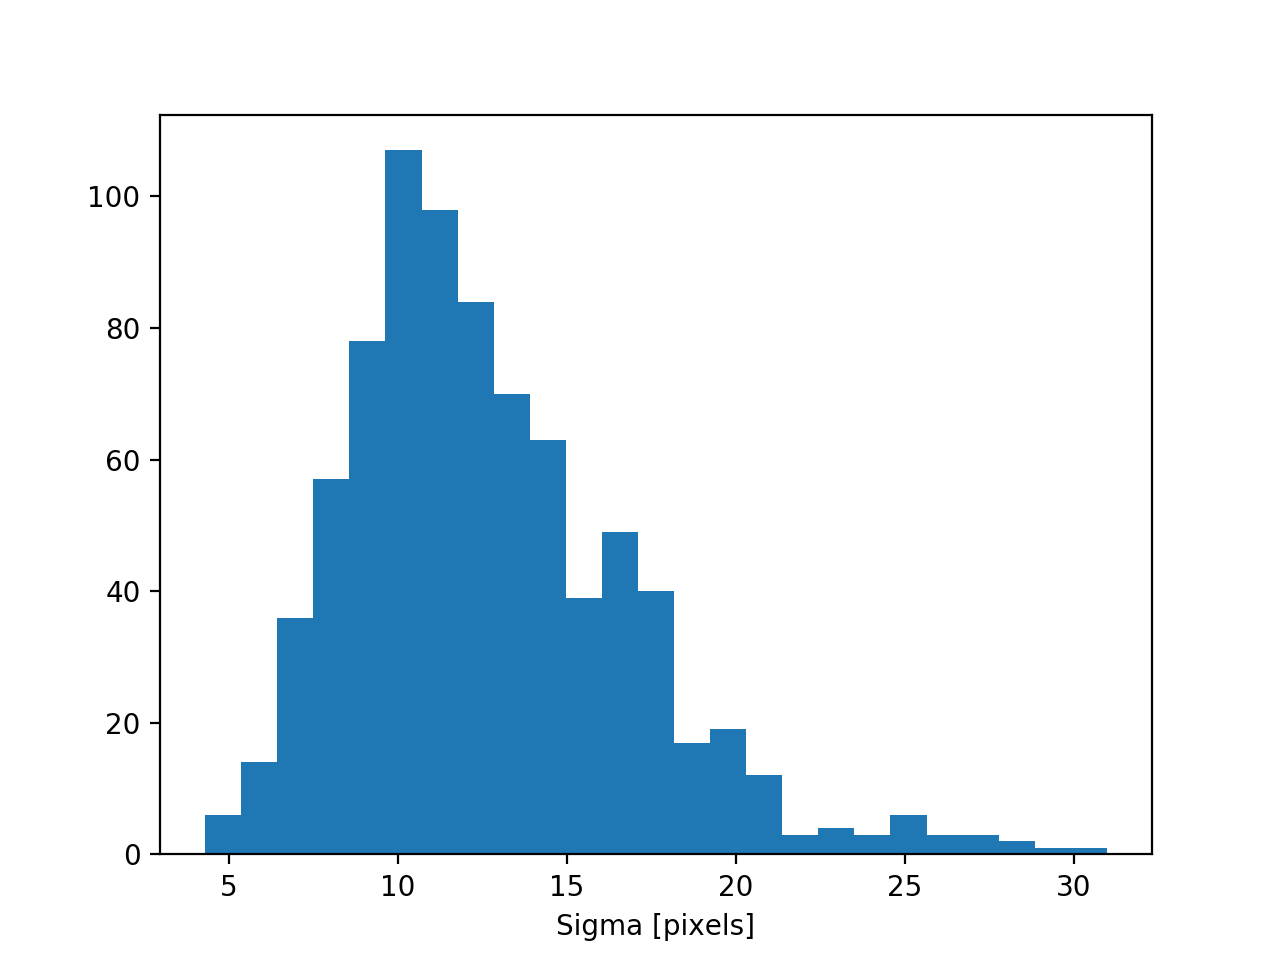

Text(0.5, 0, 'Sigma [pixels]')

In [23]:
fig, ax = plt.subplots(1,1)
ax.hist(df['Fit StdErr'], bins=25)
ax.set_xlabel('Sigma [pixels]')

<IPython.core.display.Javascript object>


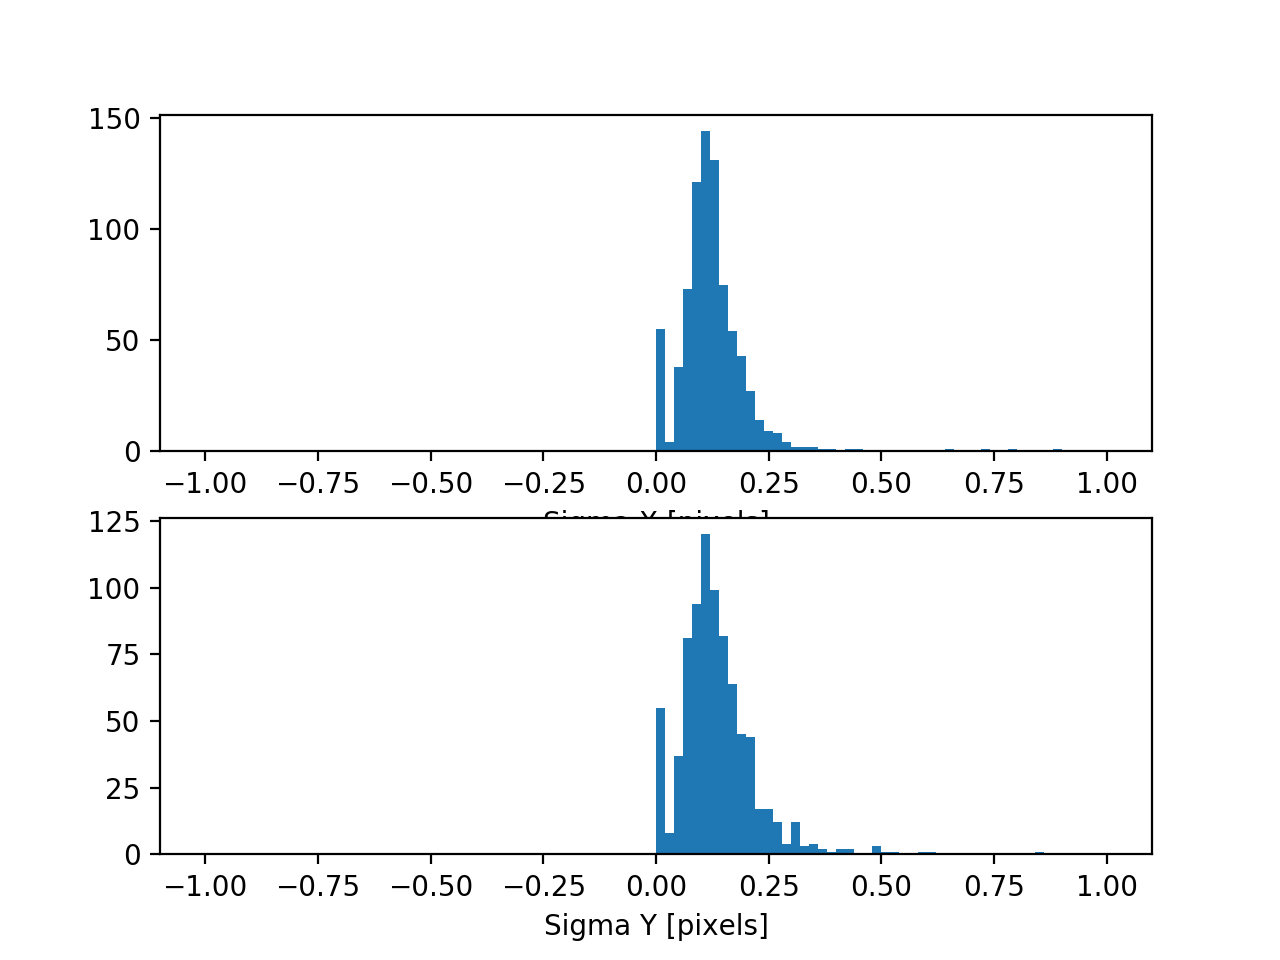

Text(0.5, 0, 'Sigma Y [pixels]')

In [24]:
fig, ax = plt.subplots(2,1)
ax[0].hist(df['Fit Err X'], bins=100, range=(-1,1))
ax[0].set_xlabel('Sigma X [pixels]')
ax[1].hist(df['Fit Err Y'], bins=100, range=(-1,1))
ax[1].set_xlabel('Sigma Y [pixels]')

In [25]:
pycentroids._pycentroids.__version__

'v0.1.3+'